In [2]:
import skimage.io as io
import scipy.io as scipyio
from PIL import Image
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import ImageOps
import imgaug.augmenters as iaa
import imgaug as ia

In [117]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
path_to_depth = 'NYU_data/nyu_depth_v2_labeled.mat'
f = h5py.File(path_to_depth)
print(f.keys())
len(f['images'])

<KeysViewHDF5 ['#refs#', '#subsystem#', 'accelData', 'depths', 'images', 'instances', 'labels', 'names', 'namesToIds', 'rawDepthFilenames', 'rawDepths', 'rawRgbFilenames', 'sceneTypes', 'scenes']>


1449

In [26]:
import scipy.io
path_to_sun3D = 'Sun3D_data/SUNRGBDtoolbox/SUNRGBDtoolbox/traintestSUNRGBD/allsplit.mat'
f2 = scipy.io.loadmat(path_to_sun3D)
print(f2.keys())
len(f2['images'])

dict_keys(['__header__', '__version__', '__globals__', 'alltrain', 'alltest', 'trainvalsplit'])


In [4]:
imag = f['images'][0]
imag.shape

(3, 640, 480)

In [6]:
# reshape
im = np.transpose(imag, (2, 1, 0))
im.shape

(480, 640, 3)

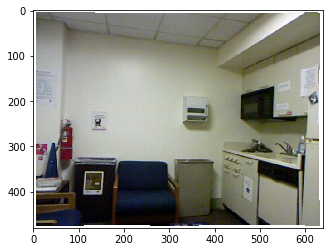

In [7]:
img__= Image.fromarray(im.astype(np.uint8), 'RGB')
plt.imshow(np.asarray(img__))

In [6]:
img__.size

(640, 480)

(624, 468)

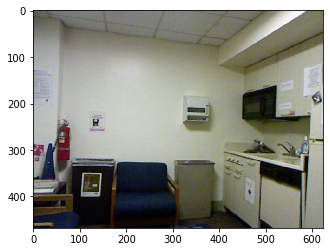

In [8]:
border = (8, 6, 8, 6) # left, up, right, bottom
cropped_img = ImageOps.crop(img__, border)

plt.imshow(np.asarray(cropped_img))
cropped_img.size

(228, 304, 3)

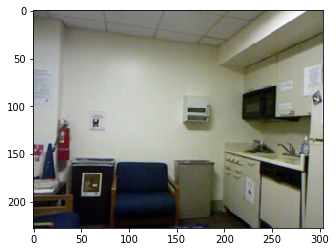

In [9]:
resized_img = cropped_img.resize((304, 228), Image.BILINEAR)
plt.imshow(np.asarray(resized_img))
resized_img.size
np.asarray(resized_img).shape

array([], dtype=float32)

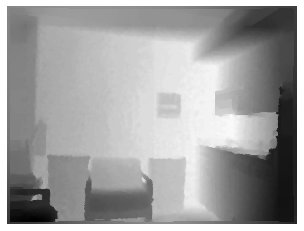

In [18]:
# read corresponding depth (aligned to the image, in-painted) of size [640 x 480], float64
depth = f['depths'][0].T

plt.imshow(depth,cmap='gray')
plt.axis('off')

dp = f['depths']
np.asarray(depth)[np.asarray(depth)< 0.3]
#np.asarray(depth).shape
#np.max(np.asarray(depth))

In [41]:
dpth_arr = np.asarray(depth)
np.min(dpth_arr)
dpth_arr[dpth_arr< 2.0]
dpth_arr[dpth_arr< 2.0] = 0.0
dpth_arr[dpth_arr< 2.0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


(128, 160)

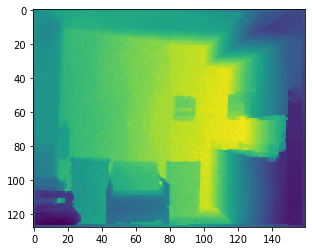

In [13]:
dpth = Image.fromarray(depth.astype(np.float64))
resized_dpth = dpth.resize((160, 128), Image.NEAREST)
dpth = np.array(dpth)/1000.
plt.imshow(np.asarray(resized_dpth))
resized_dpth1 = np.expand_dims(resized_dpth, axis = 3)
resized_dpth1.size
np.asarray(resized_dpth).shape

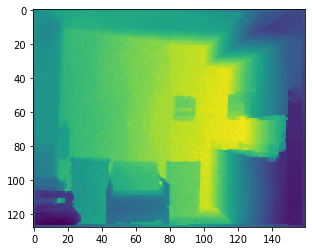

In [44]:
plt.imshow(np.asarray(resized_dpth)/0.5)

In [21]:
depth -= depth.min()
depth /= (depth.max()-depth.min())

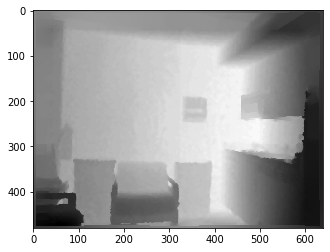

In [22]:
plt.imshow(depth,cmap='gray')

In [101]:
    from PIL import Image
    from PIL import ImageOps
    
    images = []
    depths = []

    for index in range(0,50):

        img_file = f['images'][index]
        dpth_file = f['depths'][index].T
        
        img_reshaped = np.transpose(img_file, (2, 1, 0))
        
        img= Image.fromarray(img_reshaped.astype(np.uint8), 'RGB')
        dpth = Image.fromarray(dpth_file.astype(np.float64))
        
        border = (8, 6, 8, 6) # left, up, right, bottom
        cropped_img = ImageOps.crop(img, border)
        
        resized_img = cropped_img.resize((304, 228), Image.BILINEAR)
        resized_dpth = dpth.resize((160, 128), Image.NEAREST)
        resized_dpth = np.expand_dims(resized_dpth, axis = 3)
            
        #dpth -= dpth.min()
        #dpth /= (dpth.max()-dpth.min())

        images.append(np.asarray(resized_img))
        depths.append(np.asarray(resized_dpth))
        
    images = np.asarray(images)
    depths = np.asarray(depths)

In [ ]:
python train.py C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/resnet_converted/resnet50_converted.ckpt C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/nyu_depth_v2_labeled.mat C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/splits.mat

python train.py /media/sdb/jesh/AppProject/FCRN-DepthPrediction/resnet_converted/resnet50_converted.ckpt /media/sdb/jesh/AppProject/FCRN-DepthPrediction/NYU_data/nyu_depth_v2_labeled.mat /media/sdb/jesh/AppProject/FCRN-DepthPrediction/NYU_data/splits.mat

python evaluate.py C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/tensorflow/models/model_99.ckpt C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/nyu_depth_v2_labeled.mat C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/splits.mat
        
python predict.py C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/tensorflow/models/checkpoints/simple_randomcrop_eval_93.ckpt C:/Users/jeshw/Desktop/AppProject/FCRN-DepthPrediction/NYU_data/nyu_depth_v2_labeled.mat

In [121]:
import scipy.io
import os, os.path

path_to_sun3D = 'Sun3D_data/SUNRGBDtoolbox/SUNRGBDtoolbox/traintestSUNRGBD/allsplit.mat'
sun_indices = scipy.io.loadmat(path_to_sun3D)['alltest']
#sunindices_length =  np.array(sun_indices)[0].size
#print(sunindices_length)
testimages = []
testgts = []

for index in np.array(sun_indices)[0]:
    sample = index[0]
    path = sample.split("SUNRGBD",1)[1]
    image_path = 'Sun3D_data/SUNRGBD/SUNRGBD' + path + '/image'
    depth_path = 'Sun3D_data/SUNRGBD/SUNRGBD' + path + '/depth'
    #print(testdepth_path)
    image_file = image_path + '/' + os.listdir(image_path)[0]
    depth_file = depth_path + '/' + os.listdir(depth_path)[0]
    testimages.append(image_file)
    testgts.append(depth_file)

test_pth = np.array(sun_indices)[0][4000][0].split("SUNRGBD",1)[1]
dataset_label = test_pth.split("/")[2]
print(type(test_pth))
print(test_pth)
print(dataset_label)
#print(len(testimages))
#testimage= Image.open(testimages[52])
#plt.imshow(testimage)
#border = (16, 16, 16, 16) # left, up, right, bottom
#cropped_img = ImageOps.crop(testimage, border)
#resized_img = cropped_img.resize((304, 228), Image.BILINEAR)
#plt.imshow(cropped_img)

<class 'str'>
/xtion/sun3ddata/mit_w85_16/16_1/0004876-000163390500/
sun3ddata


In [88]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, 'tensorflow/models')
import helpers as Intrinsic

def sun3Dintrinsic(cam):
    
    if cam == 'b3dodata':
        fx_rgb = 520.532000
        fy_rgb = 520.744400
        cx_rgb = 277.925800
        cy_rgb = 215.115000
        height = 415 #427 - 12
        width = 545 #561 - 16
        crop_size = [[374,491], [332, 436], [311, 409]] # 90%, 80%, 75% crop
    elif cam == 'NYUdata':
        fx_rgb = 518.857901
        fy_rgb = 519.469611
        cx_rgb = 284.582449
        cy_rgb = 208.736166
        height = 415 #427 - 12
        width = 545 #561- 16
        crop_size = [[374,491], [332, 436], [311, 409]] # 90%, 80%, 75% crop
    elif cam == 'align_kv2' or cam == 'kinect2data':
        fx_rgb = 529.500000
        fy_rgb = 529.500000
        cx_rgb = 365.000000
        cy_rgb = 265.000000
        height = 518 #530 - 12
        width = 714 #730 - 16
        crop_size = [[436,643], [414, 571], [388, 535]] # 90%, 80%, 75% crop
    elif cam == 'lg' or cam == 'sa' or cam == 'shr':
        fx_rgb = 693.744690
        fy_rgb = 693.744690
        cx_rgb = 360.431915
        cy_rgb = 264.750000
        height = 519 #531 - 12
        width = 665 #681 - 16
        crop_size = [[467,598], [415, 532], [389, 499]] # 90%, 80%, 75% crop
    elif cam == 'sh':
        fx_rgb = 691.584229
        fy_rgb = 691.584229
        cx_rgb = 362.777557
        cy_rgb = 264.750000
        height = 519 #531 - 12
        width = 665 #681- 16
        crop_size = [[467,598], [415, 532], [389, 499]] # 90%, 80%, 75% crop
    
    crop_cx_rgb = cx_rgb - 8 #because of white border cropping
    crop_cy_rgb = cy_rgb - 6
    
    return fx_rgb, fy_rgb ,crop_cx_rgb, crop_cy_rgb, height, width, crop_size

def findSun3DMetricCoords():
    
    cams = ['b3dodata', 'NYUdata', 'align_kv2', 'kinect2data', 'lg', 'sa', 'shr']
    orig_metric_cord = {}
    crop_metric_cord = {}
    
    for cam in cams:
        fx, fy ,cx, cy, height, width, crop_size = sun3Dintrinsic(cam)
        final_fx, final_fy ,final_cx, final_cy = Intrinsic.resizeIntrinsic(228, 304 ,fx, fy ,cx, cy, height/228) 
        orig_metric_cord[cam] = Intrinsic.findMetricCordinates(final_fx, final_fy ,final_cx, final_cy, 304, 228)
    
        # 3 crops and resize all crops to 304x228
        crop1_fx, crop1_fy ,crop1_cx, crop1_cy = Intrinsic.crop_and_resizeIntrinsic(crop_size[0][0], crop_size[0][1], height, width, fx, fy ,cx, cy, crop_size[0][0]/228 ) # 90% crop
        crop2_fx, crop2_fy ,crop2_cx, crop2_cy = Intrinsic.crop_and_resizeIntrinsic(crop_size[1][0], crop_size[1][1], height, width,fx, fy ,cx, cy, crop_size[1][0]/228) # 80% crop
        crop3_fx, crop3_fy ,crop3_cx, crop3_cy = Intrinsic.crop_and_resizeIntrinsic(crop_size[2][0], crop_size[2][1], height, width,fx, fy ,cx, cy, crop_size[2][0]/228) # 75% crop 
    
        crop_metric_cord[cam] = []
        crop_metric_cord[cam].append(Intrinsic.findMetricCordinates(crop1_fx, crop1_fy ,crop1_cx, crop1_cy, 304, 228))
        crop_metric_cord[cam].append(Intrinsic.findMetricCordinates(crop2_fx, crop2_fy ,crop2_cx, crop2_cy, 304, 228))
        crop_metric_cord[cam].append(Intrinsic.findMetricCordinates(crop3_fx, crop3_fy ,crop3_cx, crop3_cy, 304, 228))
        
    return orig_metric_cord, crop_metric_cord

org, crp = findSun3DMetricCoords()
print(org)

{'b3dodata': array([[[-0.51881447, -0.40200202],
        [-0.51775902, -0.40200202],
        [-0.51670356, -0.40200202],
        ...,
        [-0.20112281, -0.40200202],
        [-0.20006736, -0.40200202],
        [-0.19901191, -0.40200202]],

       [[-0.51881447, -0.400947  ],
        [-0.51775902, -0.400947  ],
        [-0.51670356, -0.400947  ],
        ...,
        [-0.20112281, -0.400947  ],
        [-0.20006736, -0.400947  ],
        [-0.19901191, -0.400947  ]],

       [[-0.51881447, -0.39989197],
        [-0.51775902, -0.39989197],
        [-0.51670356, -0.39989197],
        ...,
        [-0.20112281, -0.39989197],
        [-0.20006736, -0.39989197],
        [-0.19901191, -0.39989197]],

       ...,

       [[-0.51881447, -0.16462173],
        [-0.51775902, -0.16462173],
        [-0.51670356, -0.16462173],
        ...,
        [-0.20112281, -0.16462173],
        [-0.20006736, -0.16462173],
        [-0.19901191, -0.16462173]],

       [[-0.51881447, -0.16356671],
        [-0.51

In [99]:
len(crp['NYUdata'])
#crp['NYUdata'][0].shape

3

In [122]:
import scipy.io

official_split = scipy.io.loadmat('NYU_data/splits.mat')
indices = np.squeeze(official_split['testNdxs'], axis = 1)
#np.random.seed(0)
#np.random.shuffle(indices)
shuffled_indices, validation_indices = np.split(indices,[int(0.7 * len(indices))])
shuffled_indices.shape, validation_indices.shape
indices

array([   1,    2,    9,   14,   15,   16,   17,   18,   21,   28,   29,
         30,   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,
         41,   42,   43,   46,   47,   56,   57,   59,   60,   61,   62,
         63,   76,   77,   78,   79,   84,   85,   86,   87,   88,   89,
         90,   91,  117,  118,  119,  125,  126,  127,  128,  129,  131,
        132,  133,  134,  137,  153,  154,  155,  167,  168,  169,  171,
        172,  173,  174,  175,  176,  180,  181,  182,  183,  184,  185,
        186,  187,  188,  189,  190,  191,  192,  193,  194,  195,  196,
        197,  198,  199,  200,  201,  202,  207,  208,  209,  210,  211,
        212,  220,  221,  222,  250,  264,  271,  272,  273,  279,  280,
        281,  282,  283,  284,  285,  296,  297,  298,  299,  300,  301,
        302,  310,  311,  312,  315,  316,  317,  325,  326,  327,  328,
        329,  330,  331,  332,  333,  334,  335,  351,  352,  355,  356,
        357,  358,  359,  360,  361,  362,  363,  3

In [45]:
for index in indices:#test_indices:
    dpth_file = f['depths'][index-1].T
    #dpth = np.asarray(dpth_file)
    #print('Index ' + str(index) + ' ---> ' + str(np.min(dpth)) + ' and ' + str(np.max(dpth)) )
    if np.min(np.asarray(dpth_file)) < 0.7:
        print(index)

In [42]:
test_indices = np.squeeze(official_split['testNdxs'], axis = 1)
test_indices.shape

(654,)

In [153]:
np.arange(870).shape

(870,)

In [16]:
resized_imgarray = np.asarray(resized_img)

In [17]:
resized_imgarray[0,0]

array([91, 92, 81], dtype=uint8)

In [25]:
fx_rgb = 5.1885790117450188e+02;
fy_rgb = 5.1946961112127485e+02;
cx_rgb = 3.2558244941119034e+02;
cy_rgb = 2.5373616633400465e+02;

cam_matrix = np.array([[fx_rgb,0,cx_rgb],[0, fy_rgb, cy_rgb],[0,0,1]])
cam_matrix
inverse_cam_matrix = np.linalg.inv(cam_matrix)
inverse_cam_matrix

array([[ 0.00192731,  0.        , -0.6274983 ],
       [ 0.        ,  0.00192504, -0.48845238],
       [ 0.        ,  0.        ,  1.        ]])

In [65]:
nx, ny = (304, 228)
x = np.linspace(0, nx-1, nx)
y = np.linspace(0, ny-1, ny)
xv, yv = np.meshgrid(x, y)
zv = np.ones((ny,nx))
zv.shape

(228, 304)

In [98]:
pixel_cord = np.stack((xv,yv,zv), axis=2)
pixel_cord[227][303]

array([303., 227.,   1.])

In [117]:
metric_cord = np.empty(shape=(228,304,3))
for i in range(228):
    for j in range(304):
        metric_cord[i][j] = np.dot(inverse_cam_matrix, pixel_cord[i][j])
metric_cord

array([[[-0.6274983 , -0.48845238,  1.        ],
        [-0.62557099, -0.48845238,  1.        ],
        [-0.62364368, -0.48845238,  1.        ],
        ...,
        [-0.047378  , -0.48845238,  1.        ],
        [-0.04545069, -0.48845238,  1.        ],
        [-0.04352338, -0.48845238,  1.        ]],

       [[-0.6274983 , -0.48652734,  1.        ],
        [-0.62557099, -0.48652734,  1.        ],
        [-0.62364368, -0.48652734,  1.        ],
        ...,
        [-0.047378  , -0.48652734,  1.        ],
        [-0.04545069, -0.48652734,  1.        ],
        [-0.04352338, -0.48652734,  1.        ]],

       [[-0.6274983 , -0.4846023 ,  1.        ],
        [-0.62557099, -0.4846023 ,  1.        ],
        [-0.62364368, -0.4846023 ,  1.        ],
        ...,
        [-0.047378  , -0.4846023 ,  1.        ],
        [-0.04545069, -0.4846023 ,  1.        ],
        [-0.04352338, -0.4846023 ,  1.        ]],

       ...,

       [[-0.6274983 , -0.05531828,  1.        ],
        [-0

In [133]:
resized_imgarray[0][:5]

array([[ 91,  92,  81],
       [ 93,  93,  77],
       [ 93,  96,  81],
       [ 94,  99,  90],
       [ 97, 103,  92]], dtype=uint8)

In [134]:
np.set_printoptions(suppress=True) 
transfrmd_img = np.append(resized_imgarray, metric_cord[:,:,:2],axis = 2)
transfrmd_img[0][:5]

array([[ 91.        ,  92.        ,  81.        ,  -0.6274983 ,
         -0.48845238],
       [ 93.        ,  93.        ,  77.        ,  -0.62557099,
         -0.48845238],
       [ 93.        ,  96.        ,  81.        ,  -0.62364368,
         -0.48845238],
       [ 94.        ,  99.        ,  90.        ,  -0.62171637,
         -0.48845238],
       [ 97.        , 103.        ,  92.        ,  -0.61978906,
         -0.48845238]])

In [180]:
def calculateMetricCordinates():
    
    fx_rgb = 5.1885790117450188e+02;
    fy_rgb = 5.1946961112127485e+02;
    cx_rgb = 3.2558244941119034e+02;
    cy_rgb = 2.5373616633400465e+02;

    cam_matrix = np.array([[fx_rgb,0,cx_rgb],[0, fy_rgb, cy_rgb],[0,0,1]])
    inverse_cam_matrix = np.linalg.inv(cam_matrix)
    nx, ny = (304, 228)
    x = np.linspace(0, nx-1, nx)
    y = np.linspace(0, ny-1, ny)
    xv, yv = np.meshgrid(x, y)
    zv = np.ones((ny,nx))
    pixel_cord = np.stack((xv,yv,zv), axis=2)
    metric_cord = np.empty(shape=(228,304,3))
    for i in range(228):
        for j in range(304):
            metric_cord[i][j] = np.dot(inverse_cam_matrix, pixel_cord[i][j])
    return metric_cord[:,:,:2]

calculateMetricCordinates()

array([[[-0.6274983 , -0.48845238],
        [-0.62557099, -0.48845238],
        [-0.62364368, -0.48845238],
        ...,
        [-0.047378  , -0.48845238],
        [-0.04545069, -0.48845238],
        [-0.04352338, -0.48845238]],

       [[-0.6274983 , -0.48652734],
        [-0.62557099, -0.48652734],
        [-0.62364368, -0.48652734],
        ...,
        [-0.047378  , -0.48652734],
        [-0.04545069, -0.48652734],
        [-0.04352338, -0.48652734]],

       [[-0.6274983 , -0.4846023 ],
        [-0.62557099, -0.4846023 ],
        [-0.62364368, -0.4846023 ],
        ...,
        [-0.047378  , -0.4846023 ],
        [-0.04545069, -0.4846023 ],
        [-0.04352338, -0.4846023 ]],

       ...,

       [[-0.6274983 , -0.05531828],
        [-0.62557099, -0.05531828],
        [-0.62364368, -0.05531828],
        ...,
        [-0.047378  , -0.05531828],
        [-0.04545069, -0.05531828],
        [-0.04352338, -0.05531828]],

       [[-0.6274983 , -0.05339324],
        [-0.62557099, -0.05

140.23616633400465

In [18]:
scale = 0.48717
cropped_height = 468
round(scale * cropped_height)

228

In [66]:
def initIntrinsic():
    
    fx_rgb = 5.1885790117450188e+02
    fy_rgb = 5.1946961112127485e+02
    cx_rgb = 3.2558244941119034e+02
    cy_rgb = 2.5373616633400465e+02

    crop_cx_rgb = cx_rgb - 8 #because of white border cropping
    crop_cy_rgb = cy_rgb - 6  
    
    cropped_width = 624
    cropped_height = 468
    scale = 0.48717
    new_fx, new_fy ,new_cx, new_cy = resize(cropped_height, cropped_width, fx_rgb, fy_rgb, crop_cx_rgb, crop_cy_rgb, scale) #resized to (228, 304, 3)
    
    return new_fx, new_fy ,new_cx, new_cy
    
def crop_and_resize(crop_height, crop_width, orig_height, orig_width, fx_rgb, fy_rgb, cx_rgb, cy_rgb, scale):
    
    #new_cx_rgb = cx_rgb + float(width-1)/2 - crop_col_cj
    #new_cy_rgb = cy_rgb + float(height-1)/2 - crop_row_ci
    offset_cx = (orig_height - crop_height)/2
    offset_cy = (orig_width - crop_width)/2
    new_cx_rgb = cx_rgb - offset_cx
    new_cy_rgb = cy_rgb - offset_cy
    new_fx, new_fy ,new_cx, new_cy = resize(crop_height, crop_width, fx_rgb, fy_rgb, new_cx_rgb, new_cy_rgb, scale)
    return new_fx, new_fy ,new_cx, new_cy

def resize(height, width, fx, fy, cx_rgb, cy_rgb, scale):
    
    center_x = float(width-1) / 2
    center_y = float(height-1) / 2
    orig_cx_diff = cx_rgb - center_x
    orig_cy_diff = cy_rgb - center_y
    scaled_height = round(scale * height)
    scaled_width = round(scale * width)
    scaled_center_x = float(scaled_width-1) / 2
    scaled_center_y = float(scaled_height-1) / 2
    new_fx = scale * fx
    new_fy = scale * fy
    #skew = scale * self.skew
    new_cx = scaled_center_x + scale * orig_cx_diff
    new_cy = scaled_center_y + scale * orig_cy_diff
    return new_fx, new_fy ,new_cx, new_cy
    
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :], x, y

new_fx, new_fy ,new_cx, new_cy = initIntrinsic()
metric_channels = findMetricCordinates(new_fx, new_fy ,new_cx, new_cy, 304, 228)
np.concatenate((np.asarray(resized_img), metric_channels), axis = 2)

crop_img,col_cj,row_ci = random_crop(np.asarray(cropped_img), (114, 152))
final_fx, final_fy ,final_cx, final_cy = crop_and_resize(114, 152, 228, 304, new_fx, new_fy ,new_cx, new_cy, 2.0)
resize_img = Image.fromarray(crop_img.astype(np.uint8), 'RGB').resize((304, 228), Image.BILINEAR)
crop_metric_cord = findMetricCordinates(final_fx, final_fy ,final_cx, final_cy, 304, 228)
np.asarray(resize_img).shape
crop_transfrmd_img = np.concatenate((np.asarray(resize_img), crop_metric_cord), axis = 2)
crop_transfrmd_img
#print(col_cj,row_ci)
#plt.imshow(crop_img)
#crop_img.shape
#new_fx, new_fy ,new_cx, new_cy = initIntrinsic()
#final_fx, final_fy ,final_cx, final_cy = recalculateIntrinsic(114, 152, row_ci, col_cj, new_fx, new_fy ,new_cx, new_cy, 2.0)
#resize_img = Image.fromarray(crop_img.astype(np.uint8), 'RGB').resize((304, 228), Image.BILINEAR)
#plt.imshow(np.asarray(resize_img))

NameError: name 'findMetricCordinates' is not defined

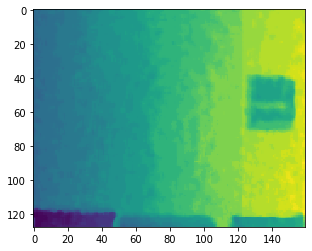

In [189]:
dpthe = Image.fromarray(dpth.astype(np.float64))
crop_dpth = np.asarray(ImageOps.crop(dpthe, border))[row_ci:row_ci+224, col_cj: col_cj + 304]
rescaled_dpth = Image.fromarray(crop_dpth).resize((160, 128), Image.NEAREST)
plt.imshow(rescaled_dpth)

0


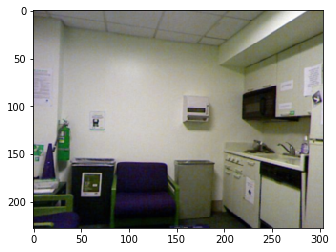

In [21]:
angle = np.random.randint(-10,10)
print(angle)
rotate = iaa.Affine(rotate=angle)
rotated_img = rotate.augment_image(np.asarray(resized_img))
rotated_dpth = rotate.augment_image(np.asarray(resized_dpth))
#plt.imshow(rotated_img)

colorjitter = iaa.AddToHueAndSaturation((-60, 60))
enhanced_img = colorjitter.augment_image(np.asarray(resized_img))
#plt.imshow(enhanced_img)

#swapcolor = iaa.ChangeColorspace(from_colorspace="RGB", to_colorspace="GRB")
swapped_img =  np.asarray(resized_img)[..., [1, 0, 2]] #swapcolor.augment_image(np.asarray(resized_img))
plt.imshow(swapped_img)


flp = iaa.VerticalFlip(0.5)
flipped_img = flp.augment_image(np.asarray(resized_img))
flipped_dpth = flp.augment_image(np.asarray(resized_dpth))
#plt.imshow(flipped_img)

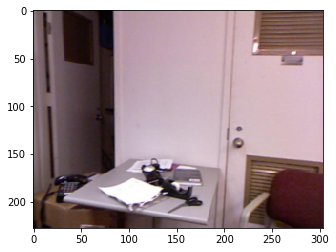

In [61]:
plt.imshow(resized_img)

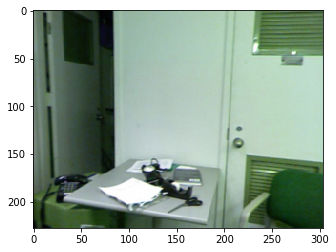

In [62]:
resized_img_array = np.array(resized_img)
red = resized_img_array[:,:,0].copy()
green = resized_img_array[:,:,1].copy()

resized_img_array[:,:,1] = red
resized_img_array[:,:,0] = green
#resized_img_array
plt.imshow(resized_img_array)

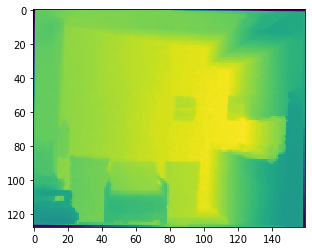

In [284]:
plt.imshow(rotated_dpth)

In [71]:
def augment_images(im_dir, indices): 
    f = h5py.File(im_dir)
    augmented_imgs = []
    augmented_gts = []
    ia.seed(1)
    print(indices.shape)
    for index in indices:
        img_file = f['images'][index]
        dpth_file = f['depths'][index].T
        
        img_reshaped = np.transpose(img_file, (2, 1, 0))
        
        img= Image.fromarray(img_reshaped.astype(np.uint8), 'RGB')
        dpth = Image.fromarray(dpth_file.astype(np.float64))
        
        border = (16, 16, 16, 16) # left, up, right, bottom
        cropped_img = ImageOps.crop(img, border)
        
        border = (16, 16, 16, 16) # left, up, right, bottom
        cropped_dpth = ImageOps.crop(dpth, border)
        
        resized_img = cropped_img.resize((304, 228), Image.BILINEAR)       
        resized_dpth = cropped_dpth.resize((160, 128), Image.NEAREST)      
        resized_dpth = np.expand_dims(resized_dpth, axis = 3)
        
        augmented_imgs.append(np.asarray(resized_img))
        augmented_gts.append(np.asarray(resized_dpth))
        
        augment_operations(cropped_img, cropped_dpth, resized_img, resized_dpth, augmented_imgs, augmented_gts)
        
    augmented_imgs = np.asarray(augmented_imgs)
    augmented_gts = np.asarray(augmented_gts)
    
    return augmented_imgs,augmented_gts

def augment_operations(cropped_img, cropped_dpth, resized_img, resized_dpth, augmented_imgs, augmented_gts):
    
    for i in range(3):
        crop_img,col_cj,row_ci = random_crop(np.asarray(cropped_img), (228, 304))
        resize_img = Image.fromarray(crop_img.astype(np.uint8), 'RGB').resize((304, 228), Image.BILINEAR)
        crop_dpth = np.asarray(cropped_dpth)[row_ci:row_ci+228, col_cj: col_cj + 304]
        resize_dpth = Image.fromarray(crop_dpth).resize((160, 128), Image.NEAREST)
        resize_dpth = np.expand_dims(resize_dpth, axis = 3)
        augmented_imgs.append(np.asarray(resize_img))
        augmented_gts.append(np.asarray(resize_dpth))
        
    angle = np.random.randint(-5,5)
    rotate = iaa.Affine(rotate=angle)
    rotated_img = rotate.augment_image(np.asarray(cropped_img))
    rotated_img = Image.fromarray(rotated_img.astype(np.uint8), 'RGB').resize((304, 228), Image.BILINEAR)
    rotated_dpth = rotate.augment_image(np.asarray(cropped_dpth))
    rotated_dpth = Image.fromarray(rotated_dpth).resize((160, 128), Image.NEAREST)
    rotated_dpth = np.expand_dims(rotated_dpth, axis = 3)
    #augmented_imgs.append(np.asarray(rotated_img))
    #augmented_gts.append(np.asarray(rotated_dpth))
    
    swapped_img = np.array(resized_img)
    red = swapped_img[:,:,0].copy()
    green = swapped_img[:,:,1].copy()
    swapped_img[:,:,1] = red
    swapped_img[:,:,0] = green
    augmented_imgs.append(np.asarray(swapped_img))
    augmented_gts.append(np.asarray(resized_dpth))
        
    #colorjitter = iaa.AddToHueAndSaturation((-60, 60))
    #enhanced_img = colorjitter.augment_image(np.asarray(resized_img))
    #augmented_imgs.append(np.asarray(enhanced_img))
    #augmented_gts.append(np.asarray(resized_dpth))
        
    #flp = iaa.VerticalFlip(1)
    #flipped_img = flp.augment_image(np.asarray(resized_img))
    #flipped_dpth = flp.augment_image(np.asarray(resized_dpth))
    #augmented_imgs.append(np.asarray(flipped_img))
    #augmented_gts.append(np.asarray(flipped_dpth))
    
    brghtperturbator =  iaa.Multiply((0.8, 1.2), per_channel=0.2) #Multiply all pixels in an image with a random value sampled once per image 
    perturbed_img = brghtperturbator.augment_image(np.asarray(resized_img))
    augmented_imgs.append(np.asarray(perturbed_img))
    augmented_gts.append(np.asarray(resized_dpth))
    
    #brghtperturbator2 =  iaa.Add((-10, 10), per_channel=0.5) #change brightness of images (by -10 to 10 of original value)
    #perturbed_img2 = brghtperturbator2.augment_image(np.asarray(resized_img))
    #augmented_imgs.append(np.asarray(perturbed_img2))
    #augmented_gts.append(np.asarray(resized_dpth))
    
    flp2 = iaa.HorizontalFlip(1)
    flipped_img2 = flp2.augment_image(np.asarray(resized_img))
    flipped_dpth2 = flp2.augment_image(np.asarray(resized_dpth))
    augmented_imgs.append(np.asarray(flipped_img2))
    augmented_gts.append(np.asarray(flipped_dpth2))
        
immgs, dppths = augment_images(path_to_depth, shuffled_indices)

(556,)


C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:53: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [73]:
immgs.shape

(3892, 228, 304, 3)

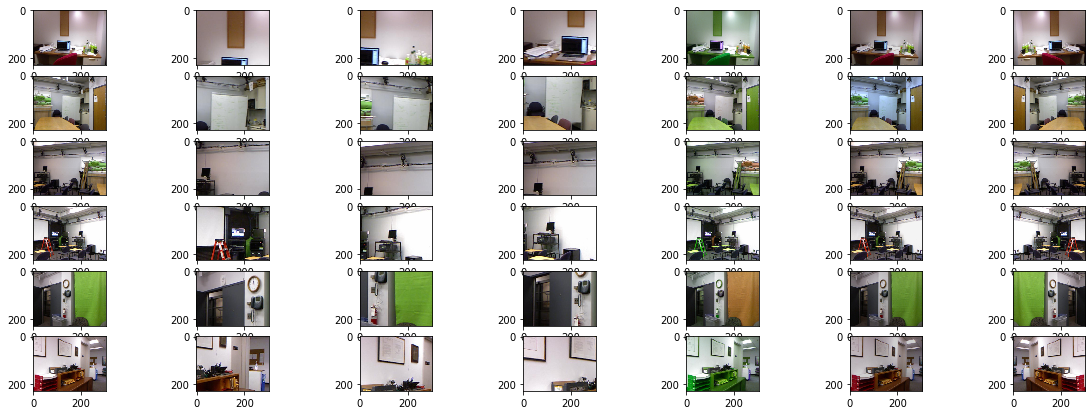

In [74]:
fig=plt.figure(figsize=(20,7))
columns = 7
rows = 6
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(immgs[i])
plt.show()

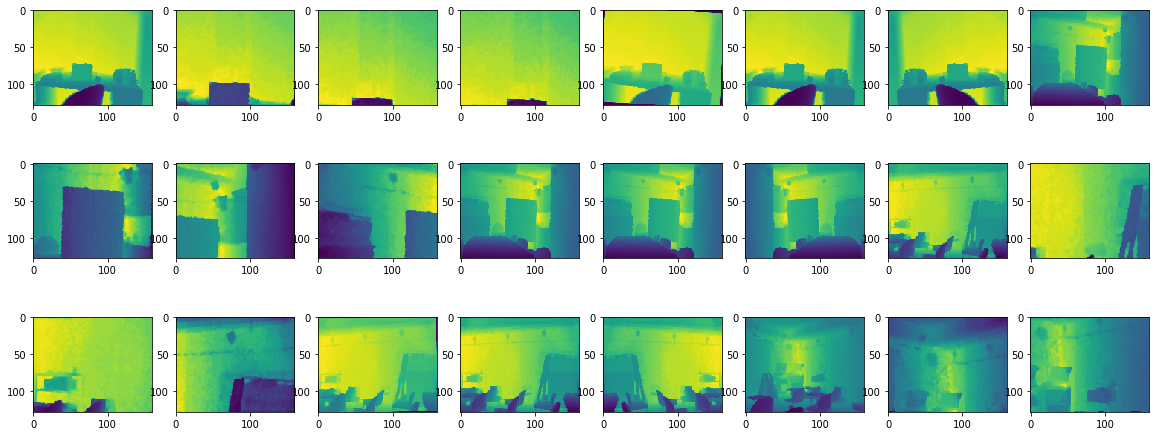

In [48]:
fig=plt.figure(figsize=(20, 8))
columns = 8
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(dppths[i][:,:,0])
plt.show()

In [67]:
def findMetricCordinates(fx_rgb, fy_rgb, cx_rgb, cy_rgb, width_px, height_px):

    cam_matrix = np.array([[fx_rgb,0,cx_rgb],[0, fy_rgb, cy_rgb],[0,0,1]])
    inverse_cam_matrix = np.linalg.inv(cam_matrix)
    nx, ny = (width_px, height_px)
    x = np.linspace(0, nx-1, nx)
    y = np.linspace(0, ny-1, ny)
    xv, yv = np.meshgrid(x, y)
    zv = np.ones((ny,nx))
    pixel_cord = np.stack((xv,yv,zv), axis=2)
    metric_cord = np.empty(shape=(ny,nx,3))
    for i in range(ny):
        for j in range(nx):
            metric_cord[i][j] = np.dot(inverse_cam_matrix, pixel_cord[i][j])
    return metric_cord[:,:,:2]

final_fx, final_fy ,final_cx, final_cy = initIntrinsic()
metric_channels = findMetricCordinates(final_fx, final_fy ,final_cx, final_cy, 304, 228)
np.concatenate((np.asarray(resized_img), metric_channels), axis = 2)

array([[[133.        , 115.        , 113.        ,  -0.61107712,
          -0.47589769],
        [138.        , 120.        , 120.        ,  -0.60712098,
          -0.47589769],
        [133.        , 115.        , 116.        ,  -0.60316485,
          -0.47589769],
        ...,
        [118.        ,  88.        ,  74.        ,   0.57971932,
          -0.47589769],
        [118.        ,  87.        ,  67.        ,   0.58367545,
          -0.47589769],
        [115.        ,  85.        ,  58.        ,   0.58763158,
          -0.47589769]],

       [[134.        , 116.        , 116.        ,  -0.61107712,
          -0.47194621],
        [138.        , 120.        , 119.        ,  -0.60712098,
          -0.47194621],
        [133.        , 115.        , 114.        ,  -0.60316485,
          -0.47194621],
        ...,
        [103.        ,  72.        ,  67.        ,   0.57971932,
          -0.47194621],
        [105.        ,  73.        ,  63.        ,   0.58367545,
          -0.4719

In [58]:
metric_channels.shape
np.asarray(resized_img).shape

(228, 304, 3)

In [30]:
x = np.linspace(0, 304-1, 304)
y = np.linspace(0, 228-1, 228)
x
y
xv, yv = np.meshgrid(x, y)
xv
zv = np.ones((228,304))
zv
pixel_cord = np.stack((xv,yv,zv), axis=2)
pixel_cord.shape

(228, 304, 3)

(351, 468, 3)


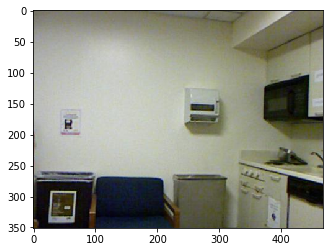

In [11]:
def crop_img(img, scale=1.0):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
    left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
    top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
    img_cropped = img[int(top_y):int(bottom_y), int(left_x):int(right_x)]
    return img_cropped


#img = cv2.imread('lena.jpg')
img_cropped = crop_img(np.array(cropped_img), 0.75)
plt.imshow(img_cropped)
print(np.shape(img_cropped))

(209, 287)  (259, 337)


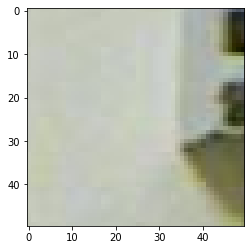

In [19]:
import operator

def cropND(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices], start, end

img_cropped,crps,crpe = cropND(np.array(cropped_img), (50,50))
plt.imshow(img_cropped)
#type(img_cropped)
print(str(crps) + '  ' + str(crpe))

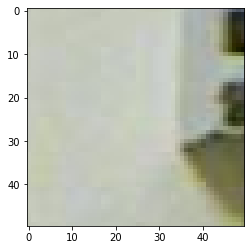

In [20]:
plt.imshow(np.array(cropped_img)[209:259,287:337,:])